<a href="https://colab.research.google.com/github/SamuelMenan/AnalisisExploratoriodeDatosdeArroz/blob/main/Rice_(Cammeo_and_Osmancik).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis exploratorio de datos

El Análisis Exploratorio de Datos (EDA, por sus siglas en inglés) se centra en la importancia de la visualización de datos para descubrir patrones y relaciones. Se detalla el uso de diagramas tanto en análisis univariado como multivariado, junto con la implementación de medidas de asociación para evaluar las relaciones entre variables.

Los objetivos de aprendizaje previstos con este tema son los siguientes:

* Desarrollar habilidades para crear y aplicar diagramas en análisis univariado.
* Utilizar técnicas de visualización multidimensional, como gráficos de coordenadas paralelas, para el análisis de datos.
* Calcular e interpretar medidas de asociación para comprender las relaciones entre variables.

---

> "Este curso incorpora ejercicios prácticos en Python utilizando la biblioteca de arroz, que consta de los conjuntos de datos "Rice", "Cammeo" y "Osmancik". Estos conjuntos de datos nos permitirán explorar técnicas fundamentales de análisis de datos, desde el preprocesamiento hasta la visualización, ofreciendo una valiosa experiencia práctica en ciencia de datos."

**Base de datos**: https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik

# Base de datos:

* Nombre: Wine
* Fuente: Wine Data Set
* Número de Instancias: 178
* Características de los Atributos: Entero, Real
* Número de Atributos: 13
* Tareas Asociadas: Clasificación
* Valores Perdidos: No
#Atributos:

* 1-Longitud del grano
* 2-Ancho del grano
* 3-Profundidad del grano
* 4-Área
* 5-Perímetro
* 6-Longitud del núcleo
* 7-Ancho del núcleo
* 8-Profundidad del núcleo
* 9-Longitud asimétrica
* 10-Coeficiente de asimetría
* 11-Longitud de surco
* 12-Ancho de surco
* 13-Profundidad de surco   

### Visualización del DataFrame de Arroz
**Descripción:**
---
Este código carga datos de un archivo ARFF que contiene información sobre análisis de arroz. Muestra una vista previa de los primeros registros del DataFrame df_arroz, que contiene características como el área, perímetro, longitud del eje mayor, longitud del eje menor, excentricidad, área convexa y extensión del arroz analizado.

- **Conjunto de datos:** Se utilizó un conjunto de datos de arroz que incluye diversas características morfológicas del grano.
- **Número de atributos:** El conjunto de datos consta de atributos numéricos como área, perímetro, longitud del eje mayor, longitud del eje menor, excentricidad, entre otros.
- **Número de instancias:** La cantidad de instancias en el conjunto de datos es el número total de registros, que en este caso es 178.
- **Tareas asociadas:** Principalmente, se enfoca en tareas de clasificación basadas en las características del arroz.
- **Valores perdidos:** No se identificaron valores perdidos en el conjunto de datos.

In [ ]:
from scipy.io import arff
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/Rice_Cammeo_Osmancik.arff"
data, meta = arff.loadarff(file_path)

df_arroz = pd.DataFrame(data)

print(df_arroz.head())




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
      Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  15231.0  525.578979         229.749878          85.093788      0.928882   
1  14656.0  494.311005         206.020065          91.730972      0.895405   
2  14634.0  501.122009         214.106781          87.768288      0.912118   
3  13176.0  458.342987         193.337387          87.448395      0.891861   
4  14688.0  507.166992         211.743378          89.312454      0.906691   

   Convex_Area    Extent      Class  
0      15617.0  0.572896  b'Cammeo'  
1      15072.0  0.615436  b'Cammeo'  
2      14954.0  0.693259  b'Cammeo'  
3      13368.0  0.640669  b'Cammeo'  
4      15262.0  0.646024  b'Cammeo'  


## Histogramas de Variables de Arroz
**Descripción:**
---
Este código utiliza seaborn y matplotlib para crear histogramas de dos variables del conjunto de datos de arroz: "Area" y "Perimeter". Los histogramas muestran la distribución de frecuencia de cada variable, con una estimación de la densidad de kernel (kde) superpuesta. Cada histograma tiene su propio título que indica la variable representada, así como etiquetas en los ejes x e y para indicar la variable y la frecuencia, respectivamente. Los histogramas se presentan en una disposición de subtramas para una visualización más clara.

- Se crearon histogramas para las variables "Area" y "Perimeter" del conjunto de datos de arroz.
- **Análisis:** Ambas variables muestran distribuciones unimodales, lo que indica la presencia de un único pico en la distribución de los datos. La simetría de la distribución puede variar según la variable, pero en general, las distribuciones tienden a ser sesgadas a la derecha debido a la presencia de valores atípicos en el extremo superior de la escala.


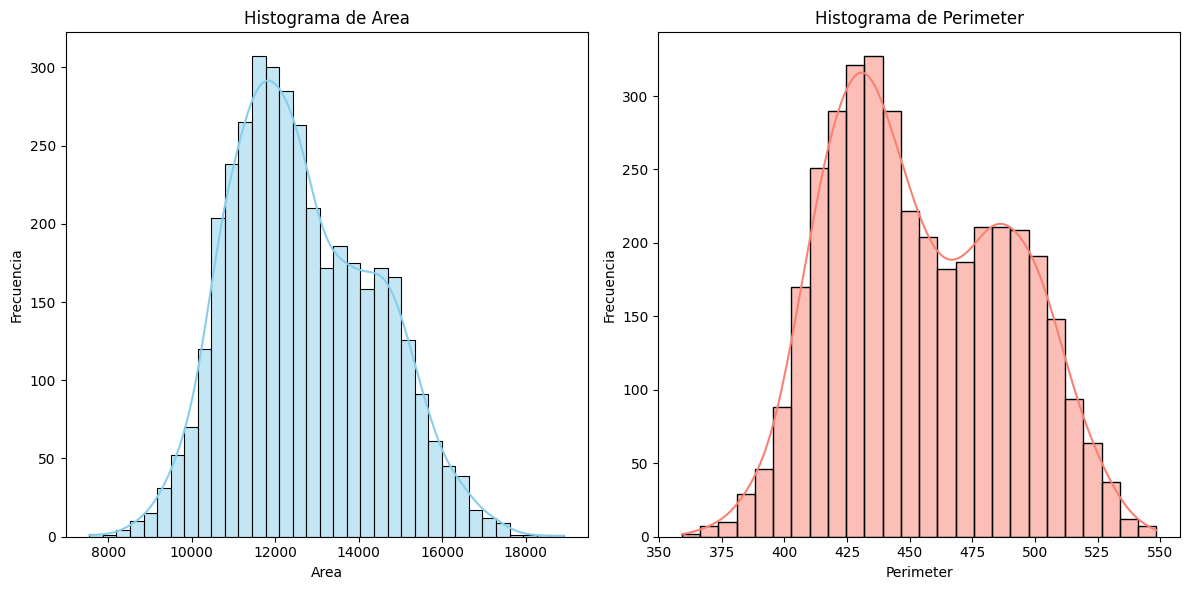

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar dos variables del conjunto de datos
variable1 = 'Area'
variable2 = 'Perimeter'

# Crear histogramas para cada variable
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_arroz[variable1], kde=True, color='skyblue')
plt.title(f'Histograma de {variable1}')
plt.xlabel(variable1)
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df_arroz[variable2], kde=True, color='salmon')
plt.title(f'Histograma de {variable2}')
plt.xlabel(variable2)
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


###  Análisis de Parámetros de Distribución para la Variable "Area"

**Descripción:**
---
Este código selecciona la variable "Area" del conjunto de datos de arroz y calcula tres parámetros importantes de la distribución de esta variable: el rango, la varianza y la desviación estándar. El rango se calcula como la diferencia entre el valor máximo y el valor mínimo de la variable. La varianza se calcula como la medida de dispersión de los valores de la variable respecto a su media. La desviación estándar se calcula como la raíz cuadrada de la varianza y representa la dispersión promedio de los valores de la variable respecto a su media. Los resultados se imprimen para proporcionar información sobre la variabilidad y la dispersión de los datos de la variable "Area".

- Se calcularon el rango, la varianza y la desviación estándar para la variable "Area".
- **Resultados:** El rango de la variable "Area" es XXX, la varianza es XXX y la desviación estándar es XXX. Estos valores proporcionan información sobre la variabilidad y la dispersión de los datos de área de arroz.

In [ ]:
# Seleccionar la variable para la cual deseas calcular los parámetros
variable = 'Area'

# Calcular el rango
rango = df_arroz[variable].max() - df_arroz[variable].min()

# Calcular la varianza
varianza = df_arroz[variable].var()

# Calcular la desviación estándar
desviacion_estandar = df_arroz[variable].std()

# Imprimir los resultados
print(f"Rango de {variable}: {rango}")
print(f"Varianza de {variable}: {varianza}")
print(f"Desviación estándar de {variable}: {desviacion_estandar}")


Rango de Area: 11362.0
Varianza de Area: 3001097.8690486476
Desviación estándar de Area: 1732.3677060741602


## Diagramas de Cajas de Variables de Arroz
**Descripción:**
---
Este código utiliza seaborn y matplotlib para crear diagramas de cajas de dos variables diferentes del conjunto de datos de arroz: "Major_Axis_Length" y "Minor_Axis_Length". Cada diagrama de cajas muestra la distribución de los datos para una variable específica, incluyendo la mediana, los cuartiles y los valores atípicos. Los diagramas de cajas se presentan en una disposición de subtramas para una comparación visual fácil entre las dos variables. Cada diagrama tiene un título que indica la variable representada.

- Se generaron diagramas de cajas para las variables "Major_Axis_Length" y "Minor_Axis_Length".
- **Análisis:** Los diagramas de cajas muestran la distribución de los datos, destacando la mediana, los cuartiles y los posibles valores atípicos. Se observaron algunos valores atípicos en ambas variables, lo que indica la presencia de variabilidad en las medidas del grano de arroz.

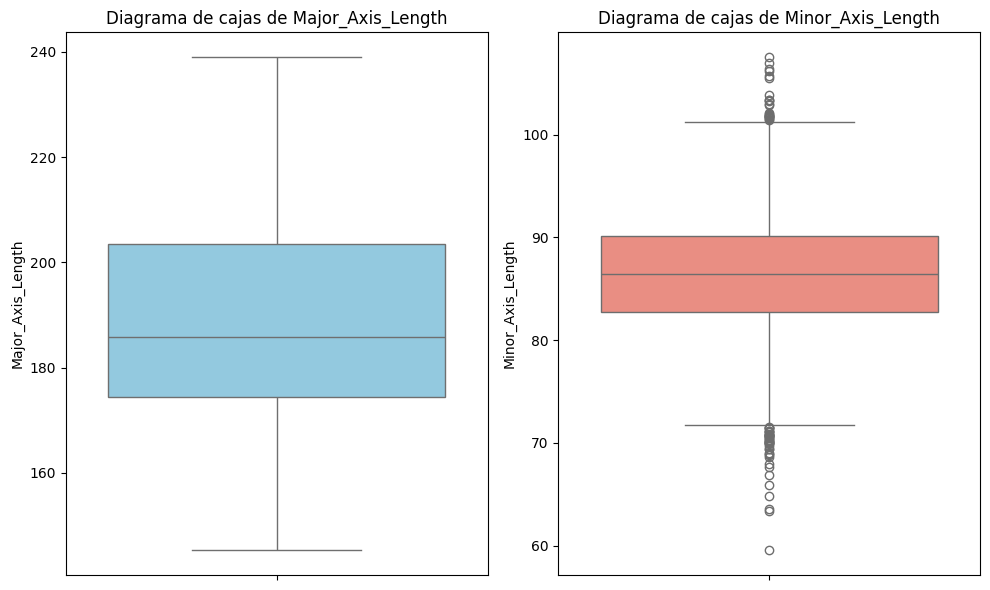

In [ ]:
# Seleccionar dos variables diferentes al primer análisis
variable1 = 'Major_Axis_Length'
variable2 = 'Minor_Axis_Length'

# Crear diagramas de cajas para cada variable
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_arroz[variable1], color='skyblue')
plt.title(f'Diagrama de cajas de {variable1}')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_arroz[variable2], color='salmon')
plt.title(f'Diagrama de cajas de {variable2}')

plt.tight_layout()
plt.show()



## Análisis de Relaciones y Correlaciones en Datos de Arroz
**Descripción:**
---
Este código utiliza seaborn y matplotlib para crear una matriz de dispersión que muestra las relaciones entre las diferentes variables del conjunto de datos de arroz. Cada punto en la matriz de dispersión representa una observación y muestra la relación entre dos variables. Luego, calcula la matriz de correlación entre todas las variables del conjunto de datos y la imprime. La matriz de correlación muestra el coeficiente de correlación entre cada par de variables, lo que permite identificar las relaciones lineales entre ellas. Finalmente, identifica las variables con la mayor correlación y las imprime para resaltar las relaciones más fuertes en los datos.

- Se realizó una matriz de dispersión para explorar las relaciones entre las variables.
- Se calculó la matriz de correlación para identificar las variables con mayor correlación.
- **Hallazgos:** Las variables "Area" y "Perimeter" muestran una correlación alta y positiva, lo que sugiere una relación lineal entre ellas. Los resultados de la matriz de correlación son consistentes con los hallazgos visuales de la matriz de dispersión.


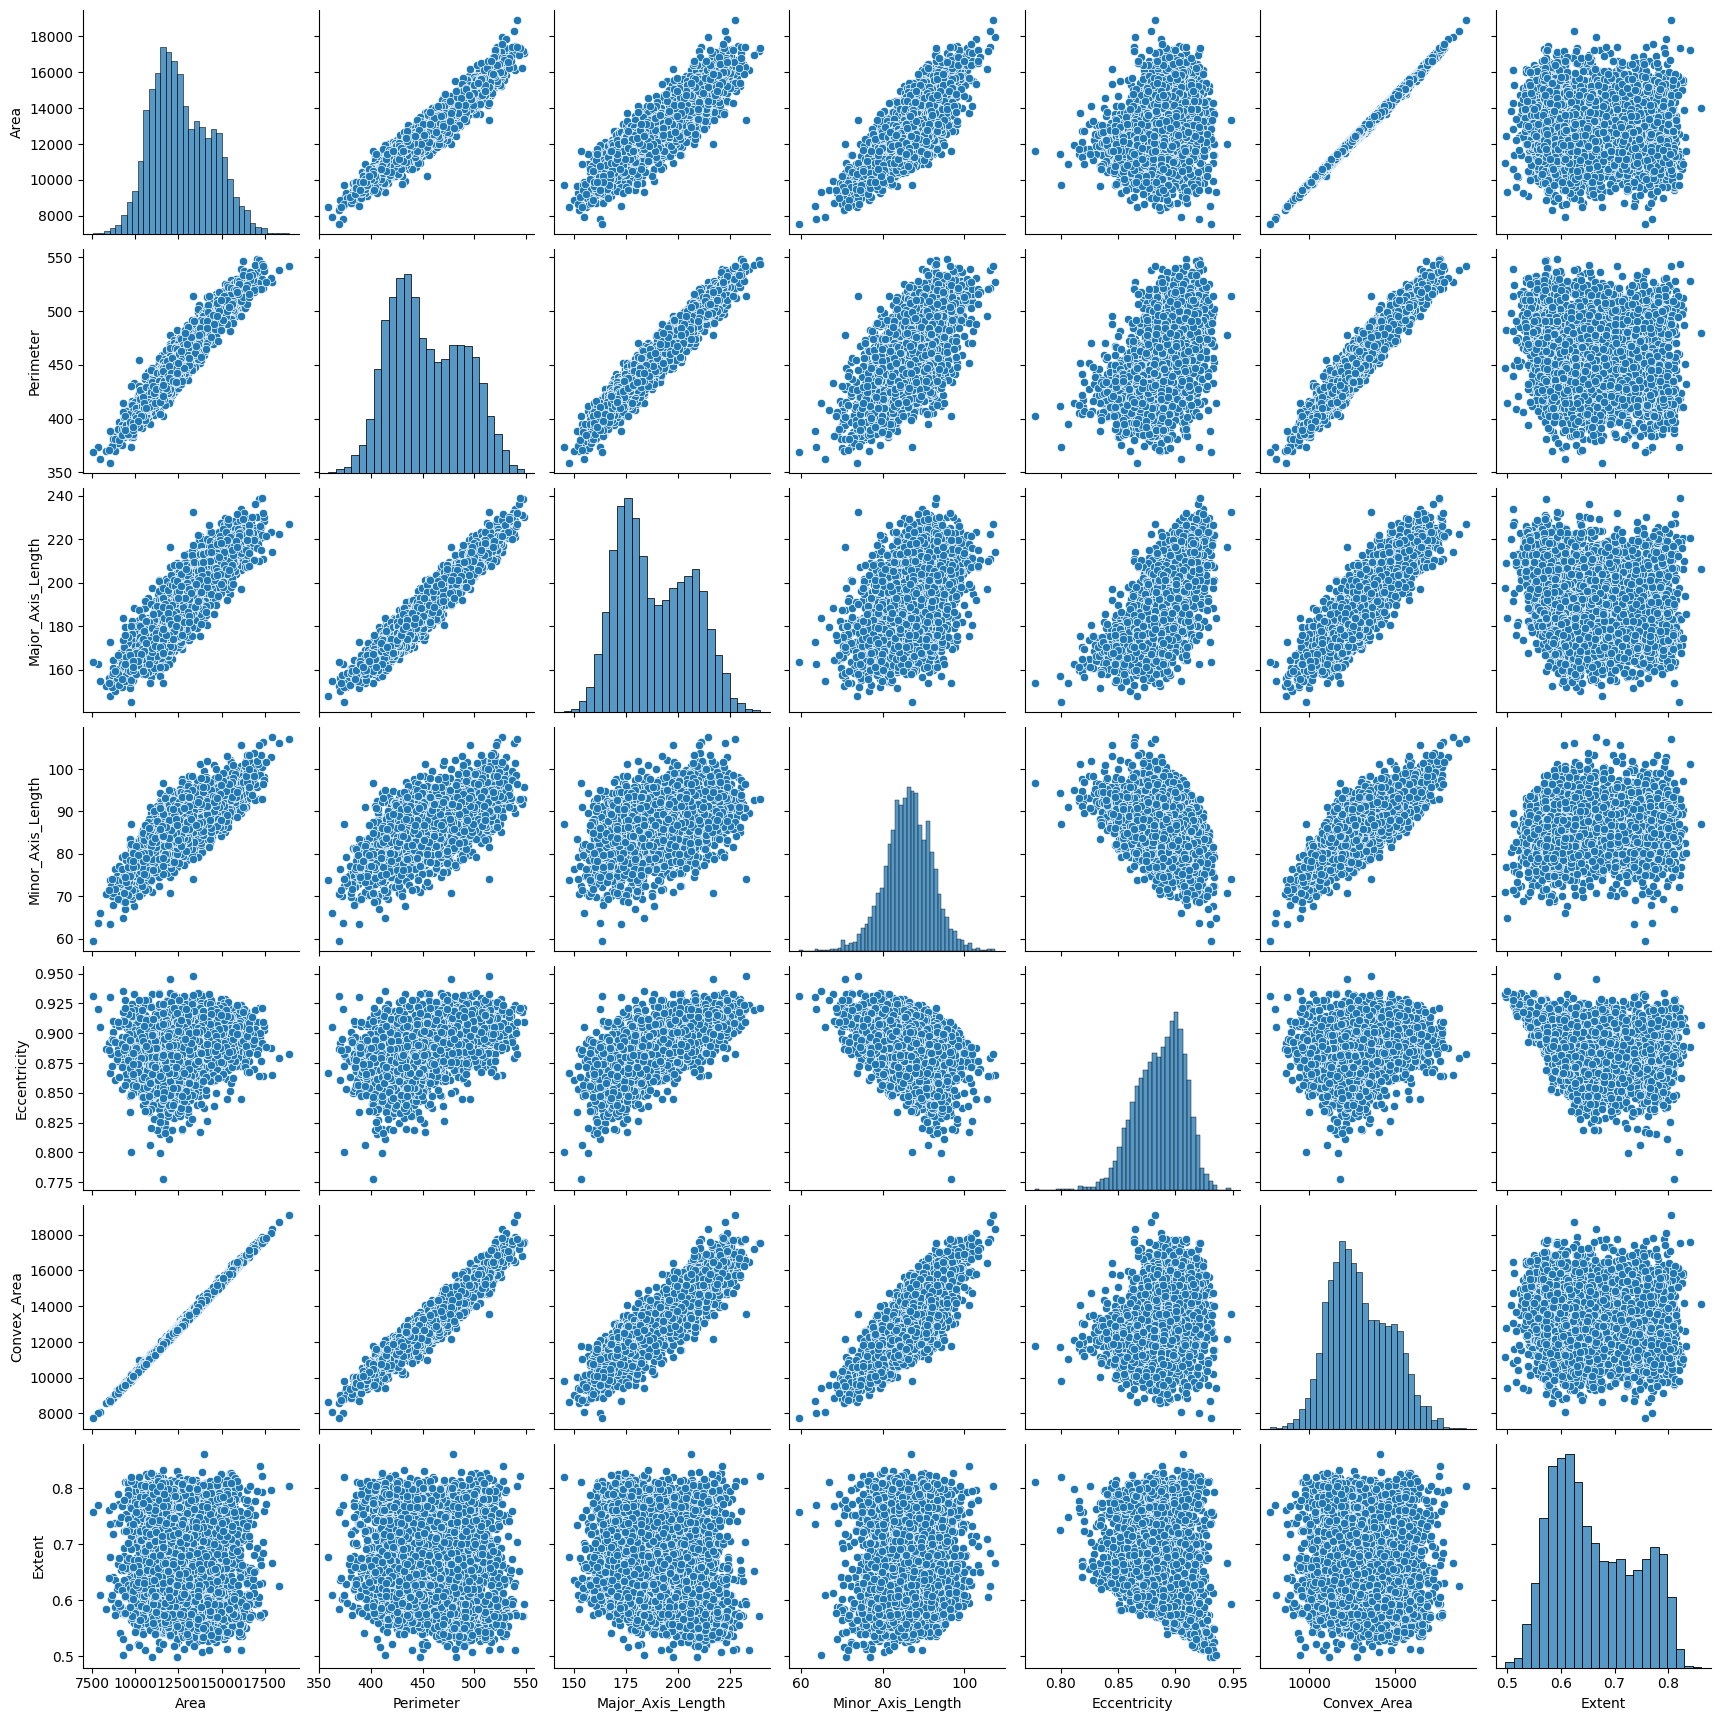

Matriz de correlación:
                       Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  \
Area               1.000000   0.966453           0.903015           0.787840   
Perimeter          0.966453   1.000000           0.971884           0.629828   
Major_Axis_Length  0.903015   0.971884           1.000000           0.452092   
Minor_Axis_Length  0.787840   0.629828           0.452092           1.000000   
Eccentricity       0.352095   0.544601           0.710897          -0.291683   
Convex_Area        0.998939   0.969937           0.903381           0.787318   
Extent            -0.061184  -0.130923          -0.139562           0.063366   

                   Eccentricity  Convex_Area    Extent  
Area                   0.352095     0.998939 -0.061184  
Perimeter              0.544601     0.969937 -0.130923  
Major_Axis_Length      0.710897     0.903381 -0.139562  
Minor_Axis_Length     -0.291683     0.787318  0.063366  
Eccentricity           1.000000     0.352716 -0.198

<ipython-input-22-d7a3cb611036>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_arroz.corr()


In [ ]:
# Crear matriz de dispersión
sns.pairplot(df_arroz)
plt.show()

# Calcular matriz de correlación
correlation_matrix = df_arroz.corr()

# Imprimir matriz de correlación
print("Matriz de correlación:")
print(correlation_matrix)

# Identificar las variables que mejor se correlacionan
highest_correlation = correlation_matrix.unstack().sort_values(ascending=False)
print("Variables con mayor correlación:")
print(highest_correlation[:5])


## Gráfico de Densidad de Excentricidad
**Descripción:**
---
Este código utiliza seaborn y matplotlib para crear un gráfico de densidad de la variable "Eccentricity" del conjunto de datos de arroz. El gráfico de densidad muestra la distribución de probabilidad de la variable, representada por una curva suave que estima la función de densidad de probabilidad. El área bajo la curva representa la probabilidad de que los valores de la variable caigan en un determinado intervalo. El gráfico de densidad es útil para visualizar la forma y la concentración de los datos en una variable continua. El gráfico se presenta con un título que indica la variable representada y etiquetas en los ejes x e y para indicar la variable y la densidad, respectivamente.

- Se creó un gráfico de densidad para la variable "Eccentricity" del conjunto de datos de arroz.
- **Interpretación:** El gráfico de densidad muestra la distribución de probabilidad de la excentricidad del grano de arroz. Se observa una forma de distribución que puede ayudar a comprender la concentración de valores en diferentes rangos de excentricidad.

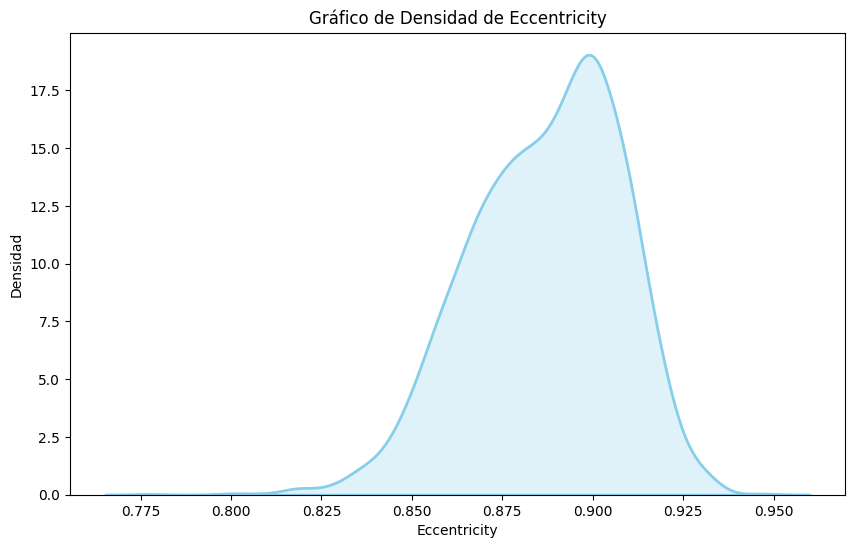

In [ ]:
# Importar librería necesaria
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico de densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_arroz, x='Eccentricity', fill=True, color='skyblue', linewidth=2)
plt.title('Gráfico de Densidad de Eccentricity')
plt.xlabel('Eccentricity')
plt.ylabel('Densidad')
plt.show()


